In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os

In [60]:
# no 9mers_imbalanced due to the very poor results

folders = ["9mers_balanced/", "9mers_random/", "9mers_random_batch64/", "9mers_weighted/"]

models = {}
approach = {}
for fold in folders:
    approach[fold] = {}
    for subfold in os.listdir(fold):
        if os.path.isdir(fold + subfold) and not subfold.startswith("."):
            if subfold not in models:
                models[subfold] = {}
            with open(fold + subfold + "/history.f1.txt") as inp:
                data = [float(x) for x in inp.readlines()]
                models[subfold][fold] = data
                approach[fold][subfold] = data

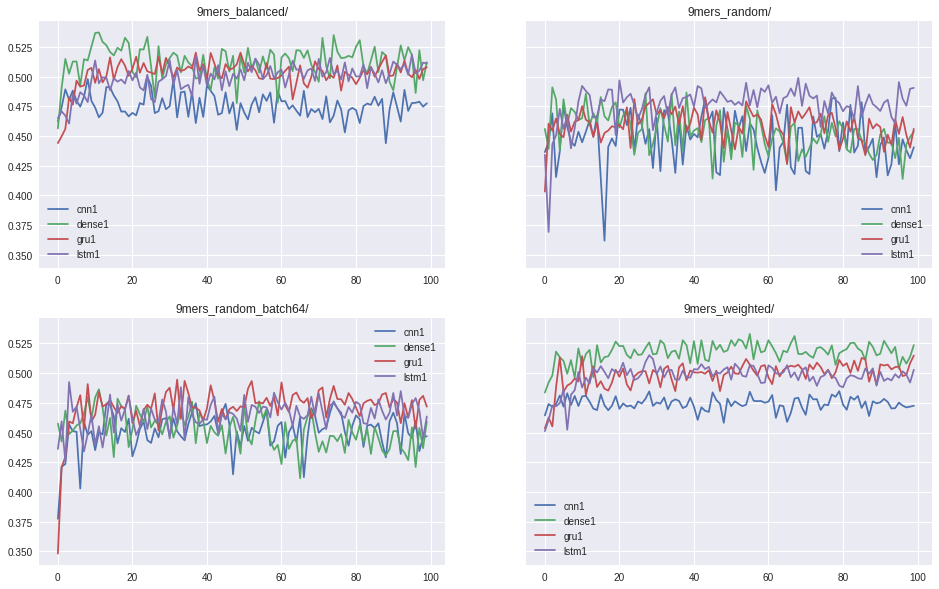

In [61]:
f, ax = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
for i, key in enumerate(folders):
    r, c = i // 2, i%2
    ax[r,c].set_title(key)
    for subkey in approach[key]:
        ax[r,c].plot(approach[key][subkey], label = subkey)
        ax[r,c].legend()

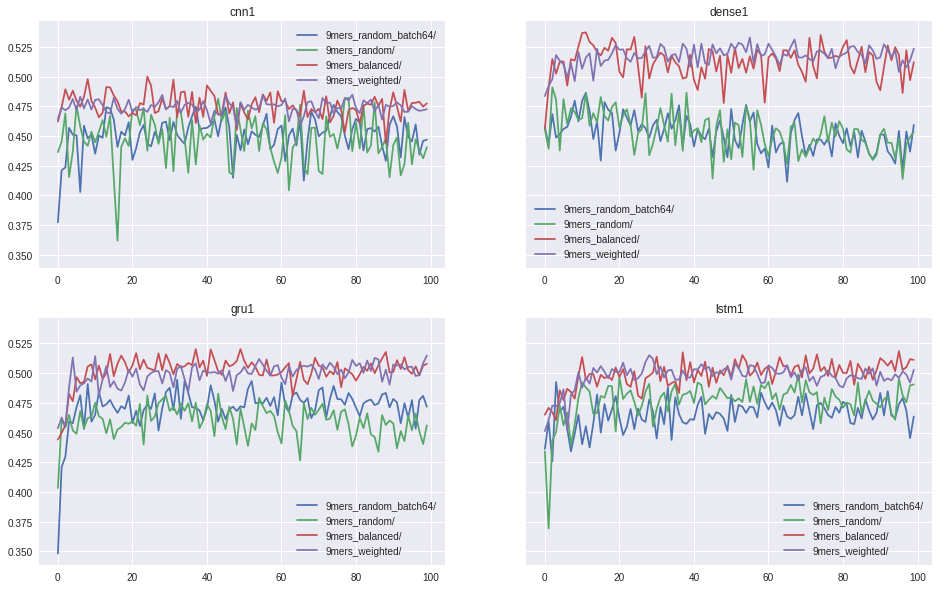

In [62]:
f, ax = plt.subplots(2,2,figsize=(16, 10), sharey=True)
for i, key in enumerate(models):
    for subkey in models[key]:
        r, c = i // 2, i%2
        ax[r,c].set_title(key)
        ax[r,c].plot(models[key][subkey], label = subkey)
        ax[r,c].legend()